Upload an image:


Saving people (1).jpeg to people (1) (1).jpeg

image 1/1 /content/people (1) (1).jpeg: 640x512 5 persons, 215.6ms
Speed: 3.8ms preprocess, 215.6ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 512)


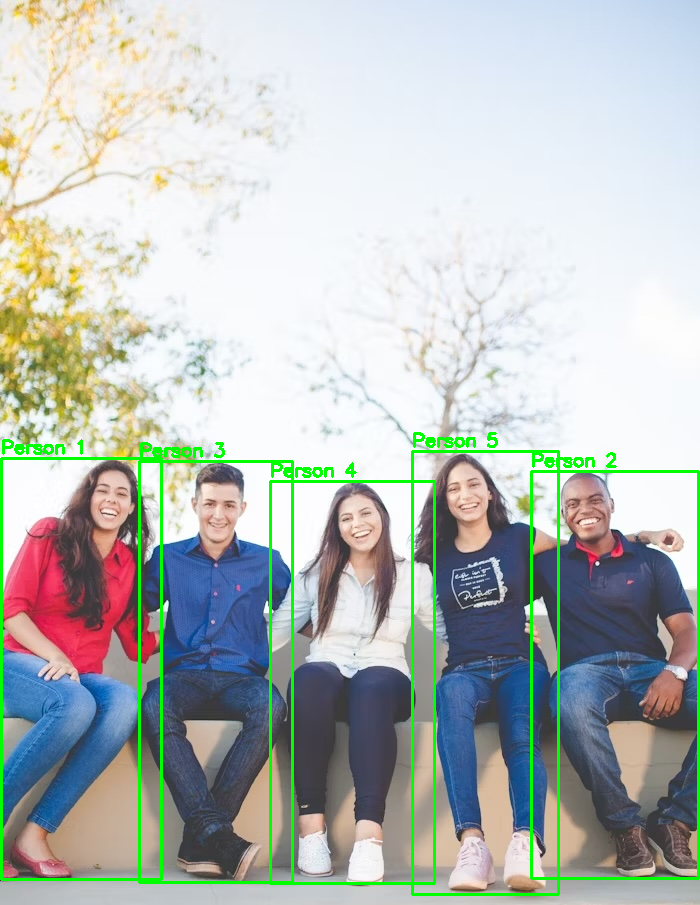

Detection complete! Annotated image saved to output/manual_people_detection.png
Total people detected and cropped: 5
Cropped images saved in 'output/crops/' folder with GREEN boundaries.


In [6]:
# Install YOLOv8 if not installed
!pip install ultralytics --quiet

from ultralytics import YOLO
import cv2
import os
from google.colab import files
from IPython.display import Image, display

# 1️⃣ Create output directories
os.makedirs('output/crops', exist_ok=True)

# 2️⃣ Upload image
print("Upload an image:")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# 3️⃣ Load YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')

# 4️⃣ Run detection
results = model(file_path)

# 5️⃣ Load image
img = cv2.imread(file_path)
img_draw = img.copy()
person_count = 0

# 6️⃣ Loop through detected boxes
for box, cls in zip(results[0].boxes.xyxy, results[0].boxes.cls):
    x1, y1, x2, y2 = map(int, box)
    cls = int(cls)

    if model.names[cls] == 'person':   # Only people
        person_count += 1

        # Draw green rectangle on full image
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_draw, f'Person {person_count}', (x1, y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

        # ---- Create the CROP with green boundary ----
        crop = img[y1:y2, x1:x2].copy()

        # Draw boundary ON the crop (coordinates local to crop)
        cv2.rectangle(crop, (0, 0), (crop.shape[1]-1, crop.shape[0]-1), (0,255,0), 3)
        cv2.putText(crop, f'Person {person_count}', (5, 25),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

        # Save cropped person with green border
        cv2.imwrite(f'output/crops/person_{person_count}.png', crop)

# 7️⃣ Save full annotated image
output_path = 'output/manual_people_detection.png'
cv2.imwrite(output_path, img_draw)

# 8️⃣ Display annotated image
_, im_buf_arr = cv2.imencode('.png', img_draw)
display(Image(data=im_buf_arr.tobytes()))

print(f"Detection complete! Annotated image saved to {output_path}")
print(f"Total people detected and cropped: {person_count}")
print("Cropped images saved in 'output/crops/' folder with GREEN boundaries.")


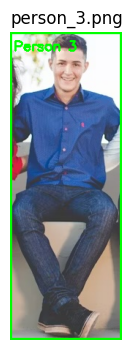

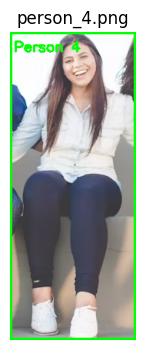

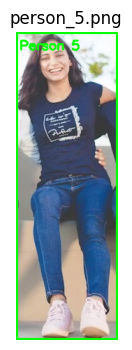

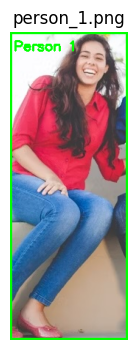

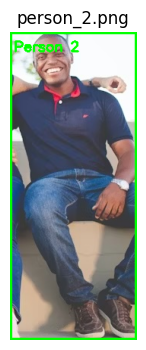

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

crop_folder = "output/crops"

# Show each cropped person image
for filename in os.listdir(crop_folder):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(crop_folder, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
        plt.show()


Saving street.jpeg to street (1).jpeg
Lamp: Visible light source mounted on street pole.
Camera: Small box-like device on pole for monitoring.
Car: Vehicle on road, typical car shape and wheels visible.
Food: Food signage visible above shop entrance.
7-Eleven: Shop signage clearly showing brand logo.
No-Entry Sign: Traffic sign with circular red border and white bar.
Person: Human figure visible walking on street.


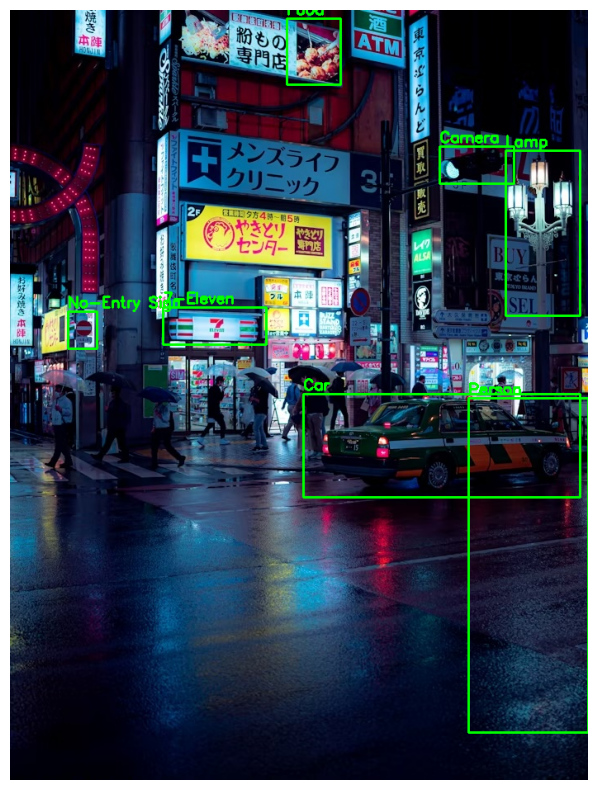

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Part A - Task 4 (Classification with Crops)
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import os

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read the uploaded image
img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

# Create folder for crops
crop_folder = 'output/classification_crops'
os.makedirs(crop_folder, exist_ok=True)

# Define objects with bounding boxes and short justification
objects = {
    'Lamp': {'coords': (600, 170, 690, 370), 'justification': 'Visible light source mounted on street pole.'},
    'Camera': {'coords': (520, 165, 610, 210), 'justification': 'Small box-like device on pole for monitoring.'},
    'Car': {'coords': (355, 465, 690, 590), 'justification': 'Vehicle on road, typical car shape and wheels visible.'},
    'Food': {'coords': (335, 10, 400, 90), 'justification': 'Food signage visible above shop entrance.'},
    '7-Eleven': {'coords': (185, 360, 310, 405), 'justification': 'Shop signage clearly showing brand logo.'},
    'No-Entry Sign': {'coords': (70, 365, 105, 410), 'justification': 'Traffic sign with circular red border and white bar.'},
    'Person': {'coords': (555, 470, 700, 875), 'justification': 'Human figure visible walking on street.'}
}

# Draw rectangles and save crops
for name, info in objects.items():
    x1, y1, x2, y2 = info['coords']

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    # Crop and save
    crop = img[y1:y2, x1:x2]
    crop_filename = os.path.join(crop_folder, f"{name.replace(' ', '_')}.png")
    cv2.imwrite(crop_filename, crop)

    # Print justification
    print(f"{name}: {info['justification']}")

# Save full annotated image
output_filename = 'output/annotated_image.png'
os.makedirs('output', exist_ok=True)
cv2.imwrite(output_filename, img)

# Display annotated image
fig = plt.figure(figsize=(12, 10))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Optional: download full image
files.download(output_filename)


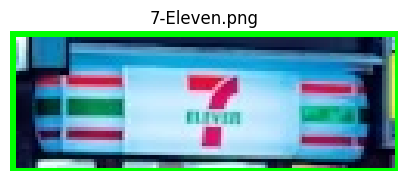

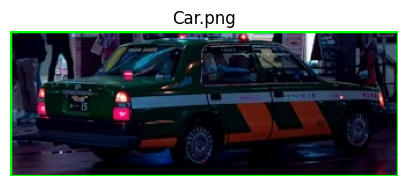

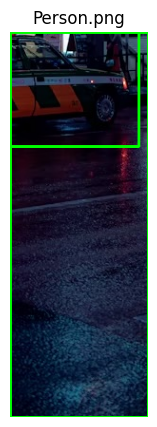

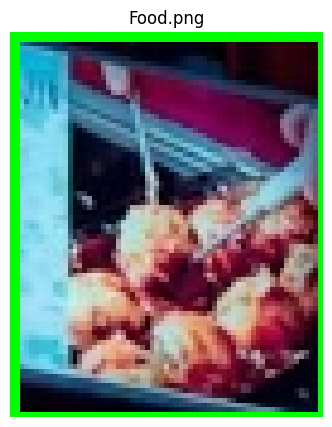

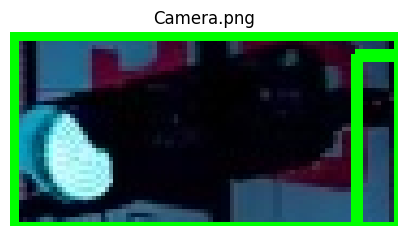

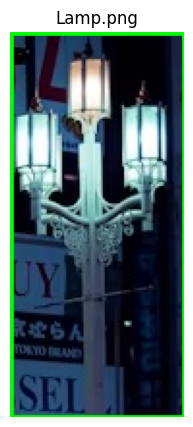

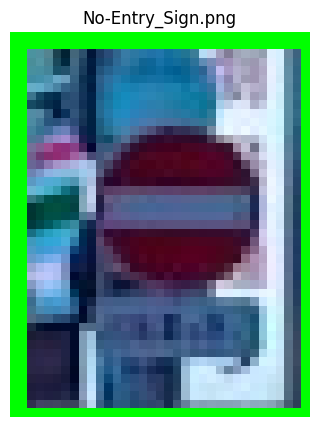

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

crop_folder = 'output/classification_crops'
crop_files = os.listdir(crop_folder)

# Display each cropped image
for file in crop_files:
    img = cv2.imread(os.path.join(crop_folder, file))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img_rgb)
    plt.title(file)
    plt.axis('off')
    plt.show()


Saving photo-1501785888041-af3ef285b470.jpeg to photo-1501785888041-af3ef285b470 (3).jpeg


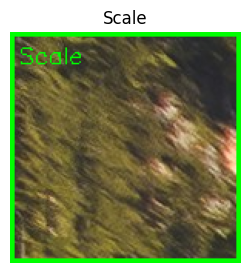

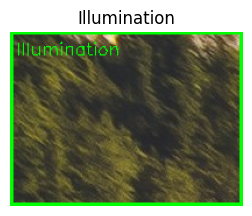

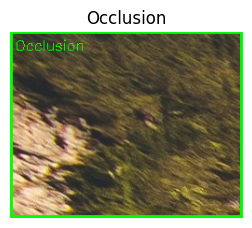

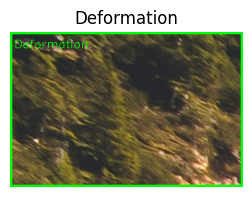

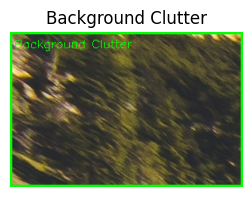

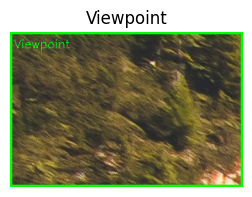

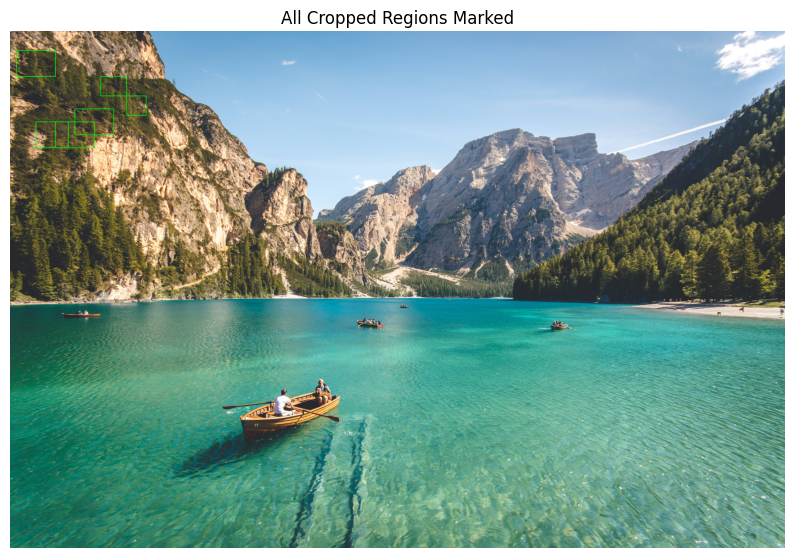

In [14]:
#PARTB
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ---------- 1️⃣ Upload Image ----------
uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
img_box = img.copy()  # copy for drawing all boxes

# ---------- 2️⃣ Function to Draw Box and Crop with GREEN boundary ----------
def draw_box_and_crop(name, x1, y1, x2, y2, color=(0,255,0)):
    """Draw bounding box on main image and show cropped region with green boundary."""

    # Draw rectangle on main image
    cv2.rectangle(img_box, (x1, y1), (x2, y2), color, 4)

    # Crop the region
    crop = img[y1:y2, x1:x2].copy()

    # Draw green boundary on crop
    cv2.rectangle(crop, (0,0), (crop.shape[1]-1, crop.shape[0]-1), (0,255,0), 3)

    # Optional: add label on crop with smaller font
    cv2.putText(crop, name, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    # Show crop
    plt.figure(figsize=(3,3))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(name)
    plt.axis('off')
    plt.show()

# ---------- 3️⃣ Define Crops ----------
draw_box_and_crop("Scale", 900, 500, 1050, 650)
draw_box_and_crop("Illumination", 700, 350, 900, 500)
draw_box_and_crop("Occlusion", 200, 700, 450, 900)
draw_box_and_crop("Deformation", 500, 600, 800, 800)
draw_box_and_crop("Background Clutter", 50, 150, 350, 350)
draw_box_and_crop("Viewpoint", 350, 700, 650, 900)

# ---------- 4️⃣ Show final main image with all boxes ----------
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
plt.title("All Cropped Regions Marked")
plt.axis('off')
plt.show()


Saving dog_book.jpeg to dog_book (6).jpeg
Image uploaded: dog_book (6).jpeg


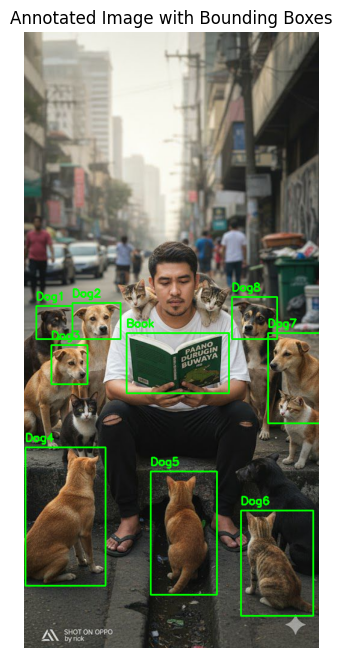

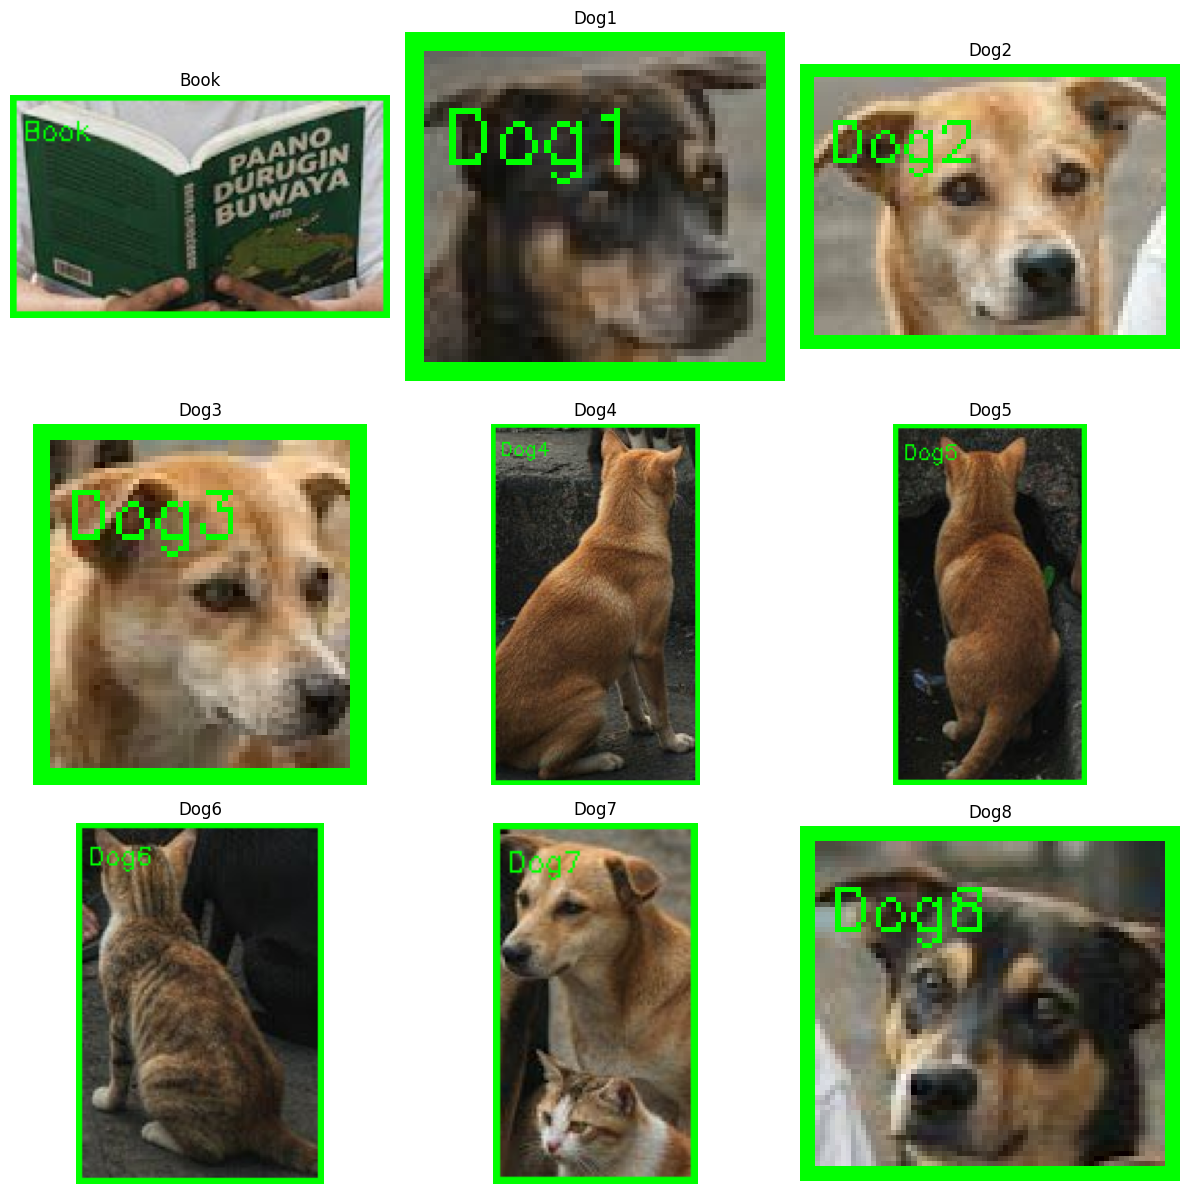

Crops saved with green boundaries in: manual_detection_crops


In [13]:
# Part C - Task 7 (WITH GREEN BOUNDARIES AROUND CROPS)

from google.colab import files
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# ---------- 1️⃣ Upload Image ----------
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read uploaded image
img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
print("Image uploaded:", filename)

# ---------- 2️⃣ Bounding Boxes ----------
# (Modify coordinates if needed)
boxes = [
    ((170, 500, 340, 600), "Book"),
    ((20, 455, 80, 510),   "Dog1"),
    ((80, 450, 160, 510),  "Dog2"),
    ((45, 520, 105, 585),  "Dog3"),
    ((2, 690, 135, 920),   "Dog4"),
    ((210, 730, 320, 935), "Dog5"),
    ((360, 795, 480, 970), "Dog6"),
    ((405, 500, 580, 650), "Dog7"),
    ((345, 440, 420, 510), "Dog8"),
]

# ---------- 3️⃣ Create Output Folder ----------
output_folder = 'manual_detection_crops'
os.makedirs(output_folder, exist_ok=True)

# ---------- 4️⃣ Draw Boxes on Original Image ----------
img_draw = img.copy()

for (x1, y1, x2, y2), label in boxes:
    cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img_draw, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

cv2.imwrite("annotated_uploaded_image.png", img_draw)

# Convert for display
img_rgb = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title("Annotated Image with Bounding Boxes")
plt.axis("off")
plt.show()

# ---------- 5️⃣ Extract, Draw Boundary, Save & Display Crops ----------
plt.figure(figsize=(12, 12))

for idx, ((x1, y1, x2, y2), label) in enumerate(boxes, start=1):

    crop = img[y1:y2, x1:x2].copy()

    # Draw GREEN border on the crop
    cv2.rectangle(
        crop,
        (0, 0),
        (crop.shape[1]-1, crop.shape[0]-1),
        (0, 255, 0),
        3
    )


    cv2.putText(
        crop, label,
        (5, 20),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4,
        (0, 255, 0),
        1
    )

    # Save crop with boundary
    cv2.imwrite(f"{output_folder}/{label}.png", crop)

    # Display crop
    crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, idx)
    plt.imshow(crop_rgb)
    plt.title(f"{label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print("Crops saved with green boundaries in:", output_folder)
